In [47]:
import pickle
import numpy as np
import scipy as sc
import sympy as sp
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

with open("output.pkl", "rb") as file:
    dVr=pickle.load(file)
    dVp=pickle.load(file)

dVr

(-3*M*V1**2*r**2 + M*(2*M - r)**2 - V3**2*r**3*(2*M - r)**2)/(r**3*(2*M - r))

In [48]:
dvr = sp.lambdify((sp.Symbol("V1"), sp.Symbol("V3"), sp.Symbol("r"), sp.Symbol("M")), dVr, "numpy")
dvp = sp.lambdify((sp.Symbol("V1"), sp.Symbol("V3"), sp.Symbol("r"), sp.Symbol("M")), dVp, "numpy")


In [49]:
print(dvr(1, 1, 1, 1))
print(dvp(1, 1, 1, 1))

-3.0
-4.0


In [50]:
def geodesic(t, state):
    r, theta, phi, V1, V2, V3 = state

    dr = V1
    dth = 0
    dph = V3
    dV1 = dvr(V1,V3,r,1)
    dV2 = 0
    dV3 = dvp(V1,V3,r,1)

    return np.array([dr, dth, dph, dV1, dV2, dV3])

In [51]:
y0 = np.array([4, np.pi/2, 0, -0.1, 0 , 0.143498197])

t = 10000
scale = int(t/1000)
M=1

t_span = (0.0, t)
t_eval = np.linspace(0,t,t+1)

def lim_fun(t,y):
    return (y[0] - 2) > 2E-13

    
lim_fun.terminal = True    
result_solve_ivp = sc.integrate.solve_ivp(geodesic, 
                                          t_span,
                                          y0,
                                          rtol=1e-14,
                                          atol=1e-15,
                                          method='RK45',
                                          t_eval=t_eval,
                                          events=lim_fun)

r = result_solve_ivp.y[0]
theta = result_solve_ivp.y[1]
phi = result_solve_ivp.y[2]

x = r * np.cos(phi)
y = r * np.sin(phi)
z = r * 0

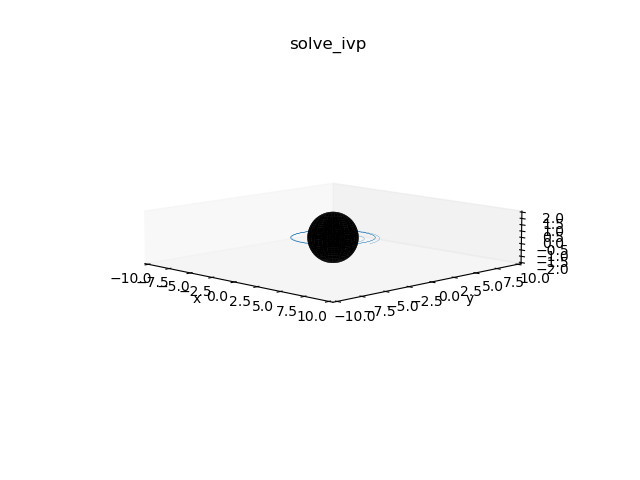

In [52]:
%matplotlib widget
bh_r = 2*M

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.cla()

bh_phi, bh_theta = np.mgrid[0:np.pi:101j, 0:2 * np.pi:101j]
bh_x = bh_r * np.sin(bh_phi) * np.cos(bh_theta)
bh_y = bh_r * np.sin(bh_phi) * np.sin(bh_theta)
bh_z = bh_r * np.cos(bh_phi)

bh = ax.plot_surface(bh_x,bh_y,bh_z,color='k')

q,= ax.plot(x,
        y,
        z, linewidth=.2)

ax.set_title("solve_ivp")
plt.xlabel("x")
plt.ylabel("y")
ax.view_init(elev=10, azim=-45)


ax.grid(False)
plt.xlim([-10, 10])
plt.ylim([-10, 10])
ax.set_aspect('equal')


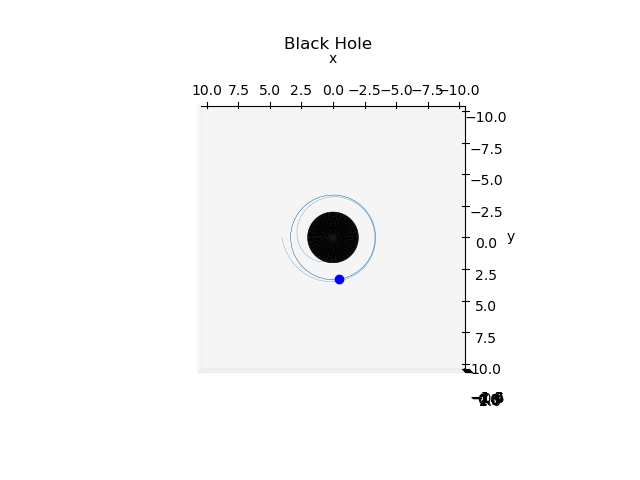

In [53]:
%matplotlib widget
bh_r = 2*M

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.cla()

bh_phi, bh_theta = np.mgrid[0:np.pi:101j, 0:2 * np.pi:101j]
bh_x = bh_r * np.sin(bh_phi) * np.cos(bh_theta)
bh_y = bh_r * np.sin(bh_phi) * np.sin(bh_theta)
bh_z = bh_r * np.cos(bh_phi)

bh = ax.plot_surface(bh_x,bh_y,bh_z,color='k')

q,= ax.plot(x,
        y,
        z, linewidth=.2)

ax.set_title("solve_ivp")
plt.xlabel("x")
plt.ylabel("y")
ax.view_init(elev=10, azim=-45)


ax.grid(False)
plt.xlim([-10, 10])
plt.ylim([-10, 10])
ax.set_aspect('equal')

from matplotlib.animation import Animation, FuncAnimation, writers
from IPython import display


frm = 50
scale = int(len(x)/frm)-1

spheres = np.empty(frm, dtype=object)

ax.set_title("Black Hole")
plt.xlabel("x")
plt.ylabel("y")

spheres[0], = ax.plot(x[0],
                    y[0],
                    z[0], 'bo')

def animation_function(ii):
    global spheres
    if ii == 0:
        return
    if ii>0:
        spheres[(ii-1)].set_visible(False)
    #plt.cla()
    ax.view_init(elev=90, azim=90)
    spheres[ii], = ax.plot(x[ii],
                    y[ii],
                    z[ii], 'bo')


    

    #plt.axis("off")

    # plt.show()


anim = FuncAnimation(fig, animation_function, frames=frm, repeat=False, interval=100)
# converting to an html5 video
video = anim.to_html5_video()

# embedding for the video
html = display.HTML(video)

# draw the animation
display.display(html)


In [43]:
spheres[0]